In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/clean3_df.csv")

In [5]:
df = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None) #read csv file without header as dataframe

In [9]:
df = shuffle(df) # shuffle csv file

In [10]:
df.columns = ["sentiment", "id", "date", "query", "user", "text"] 

In [11]:
df = df.drop(["id", "date", "query", "user"], axis = 1)

In [12]:
df.head()

,sentiment,text
1105577,4,@WeekendChica u see my follow Friday for u la...
828508,4,Gotta be up early to play #drums tomorrow at @...
1573552,4,man...im sooo EXCITED to get out of the freaki...
234165,0,I'm not feeling well! My head is still aching ...
1331928,4,Mmmm tea does the body good.


In [14]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [15]:
df['pre_clean_len'] = [len(t) for t in df.text]

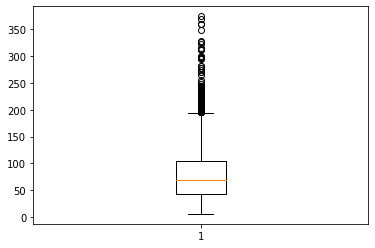

In [16]:
plt.boxplot(df.pre_clean_len) # plot pre_clean_len column
plt.show()

In [17]:
df[df.pre_clean_len > 140].head(10)  # check for any tweets greater than 140 characters


,sentiment,text,pre_clean_len
1054834,4,ready for date 3 tonight! 2 CAN PLAY THAT GA...,146
1038259,4,@microilist Sweet. I now declare myself Team S...,142
223167,0,I haven't heard from @_needcaffeine. I hope hi...,142
951068,4,@heidimontag Ur Are The Most Stunning Girl On ...,141
229374,0,@ATxB I'm so glad your cat is going to be ok. ...,142
107486,0,"// on friday i got back my 3 things, lost my p...",141
57974,0,"in Rome, just saw &quot;Angels and Demons.&quo...",143
1289478,4,watched &quot; The house bunny and Changeling&...,148
1483670,4,I had my girlies round last nyt it was amazin...,142
368036,0,A wild Turkey with her 8 chicks walked across ...,146


In [2]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets
pat2 = r'https?://[^ ]+'        # remove URL's from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URL's from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [4]:
nums = [0,1825] # used for batch processing tweets
#nums = [0, 9999]
clean_tweet_texts = [] # initialize list
for i in range(nums[0],nums[2]): # batch process 1.6 million tweets                                                               
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))  # call tweet_cleaner function and pass parameter as all the tweets to clean the tweets and append cleaned tweets into clean_tweet_texts list

IndexError: list index out of range

In [ ]:
#clean tweet text

In [24]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

In [ ]:
#lemmatizing

In [25]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

In [26]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a) # append a to clean_df1

In [27]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
clean_df['target'] = df.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [28]:
clean_df['clean_len'] = [len(t) for t in clean_df.text] # Again make a new coloumn in the dataframe and name it as clean_len which will store thw number of words in the tweet


In [29]:
clean_df[clean_df.clean_len > 140].head(10) # agin check id any tweet is more than 140 characters

,text,target,clean_len


In [30]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(1600000,)
(1600000,)


In [32]:
from sklearn.model_selection import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20

In [33]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [35]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets

In [36]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [37]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [38]:
nb.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10)

In [39]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.7958640625

In [40]:
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [41]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.796921875

In [42]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[138262,  21894],
       [ 43091, 116753]])

In [45]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

In [46]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

/Users/nasrakhalif/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.1)

In [47]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

/Users/nasrakhalif/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nasrakhalif/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

KeyboardInterrupt: 

In [ ]:
y_pred_lg = logisticRegr.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [ ]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

In [48]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0


In [49]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(random_state=0)

In [50]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.82385546875

In [51]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets


In [52]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments


array([[134048,  26108],
       [ 29638, 130206]])

In [53]:
#Train financial tweets

In [66]:
df = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/sent_df.csv")
nas = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/nasdaq.csv")
sp = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/s&p.csv")
nys = pd.read_csv("/Users/nasrakhalif/Desktop/project_data/nyse.csv")

In [ ]:
nas.head

In [67]:
df.head(1)

,Unnamed: 0,id,text,timestamp,source,symbols,company_names,Dates,Time,tokenized_text,Polarity,subjectivity
0,0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,2018-07-18,21:33:26,"['video', ':', '“', 'i', 'was', 'in', 'my', 'o...",0.6,1.0


In [61]:
df = df.drop(["id", "timestamp", "source", "symbols","company_names", "Dates", "Time","tokenized_text", "Polarity", "subjectivity"], axis = 1)

In [68]:
df = df[['text']]

In [69]:
df.head(1)

,text
0,VIDEO: “I was in my office. I was minding my o...


In [71]:
df.shape

(28276, 1)

In [70]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets
pat2 = r'https?://[^ ]+'        # remove URL's from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URL's from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [73]:
nums = [0,15000, 28276,] # used for batch processing tweets
#nums = [0, 9999]
clean_tweet_texts = [] # initialize list
for i in range(nums[0],nums[2]): # batch process 1.6 million tweets                                                               
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

In [74]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

In [75]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

In [76]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a) # append a to clean_df1

In [77]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
#clean_df['target'] = df.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [78]:
clean_df

,text
0,video wa in my office wa minding my own busine...
1,the price of lumber lb is down since hitting i...
2,who say the american dream is dead
3,barry silbert is extremely optimistic on bitco...
4,how satellite avoid attack and space junk whil...
...,...
28271,fb cb ecf
28272,btc
28273,rt nuff said tel telcoin telfam crypto blockch...
28274,btc


In [79]:
clean_df['clean_len'] = [len(t) for t in clean_df.text]

In [80]:
clean_df[clean_df.clean_len > 140].head(10)

,text,clean_len
3127,novice trader trade to time too big they are t...,10514
4221,the report is excellent in term of record prod...,1763
6251,it not how much money you make but how much mo...,13178
8043,ha lifted the united state above saudi arabia ...,7061
9006,know this will sound like clich but the single...,30745
26205,rhodes posted her petition about alleged sexua...,714


In [81]:
clean_df

,text,clean_len
0,video wa in my office wa minding my own busine...,97
1,the price of lumber lb is down since hitting i...,95
2,who say the american dream is dead,34
3,barry silbert is extremely optimistic on bitco...,106
4,how satellite avoid attack and space junk whil...,71
...,...,...
28271,fb cb ecf,9
28272,btc,3
28273,rt nuff said tel telcoin telfam crypto blockch...,74
28274,btc,3


In [82]:
X_df = clean_df.text

In [83]:
X_text_dtm = vect.transform(X_df)

In [84]:
clean_df['sentiment'] = svm_clf.predict(X_text_dtm) 

In [85]:
clean_df

,text,clean_len,sentiment
0,video wa in my office wa minding my own busine...,97,4
1,the price of lumber lb is down since hitting i...,95,0
2,who say the american dream is dead,34,0
3,barry silbert is extremely optimistic on bitco...,106,4
4,how satellite avoid attack and space junk whil...,71,0
...,...,...,...
28271,fb cb ecf,9,4
28272,btc,3,4
28273,rt nuff said tel telcoin telfam crypto blockch...,74,4
28274,btc,3,4
